# Eulerian Path
**By** [Breno D. Chrispim](https://github.com/DChrispim)

## Information 
**Task:** Create a program which will take as an input a graph and output either a Eulerian path or a Eulerian cycle, or state that it is not possible. A Eulerian Path starts at one node and traverses every edge of a graph through every node and finishes at another node. A Eulerian cycle is a eulerian Path that starts and finishes at the same node. **Note:** I wrote this code when I started learning OOP, but before studying concepts such as clean code and level of abstraction. Thus, this code has some problems in this sense.

**Source for project idea:** Final Capstone project from the Udemy's course [2022 Complete Python Bootcamp From Zero to Hero in Python](https://www.udemy.com/course/complete-python-bootcamp/). The suggestions can be found at [Projects](http://nbviewer.ipython.org/github/jmportilla/Complete-Python-Bootcamp/blob/master/Final%20Capstone%20Projects/Final%20Capstone%20Project%20Ideas.ipynb) and ware written by various users in Python. Other sources used in this project are: 

- https://algorithms.discrete.ma.tum.de/graph-algorithms/hierholzer/index_en.html
- https://rpruim.github.io/m252/S19/from-class/graphs/introduction-to-graphs.html
- https://stackoverflow.com/questions/17467228/looking-for-algorithm-finding-euler-path
- https://www.geeksforgeeks.org/eulerian-path-and-circuit/
- http://www.graph-magics.com/articles/euler.php
- https://thispointer.com/count-number-of-true-elements-in-a-numpy-array-in-python/

## Code Explanation

The code works using the class called Euler_map. The methods available are:

- Add a vertex with coordinates x and y with add_vertex(x, y);
- Remove a vertex with coordinates x and y with remove_vertex(x, y). This removes all edges linked to that vertex;
- Add an edge to the map, linking the vertices (x1,y1) and (x2,y2) (each one as list) with add_edge([x1,y1], [x2, y2]);
- Remove an edge to the map, that links two vertices (x1,y1) and (x2,y2) with remove_vertex([x1,y1], [x2, y2]);
- A list of vertex and edges is returned when the print call is done on the class;
- Show the current map using the show method;
- Show the map and number of connections using the method describe_map;
- To inquire if the current map either an Eulerian path or an Eulerian cycle, or state that it is not possible, use the method Eulerian.

Beyond those methods, the build in method count_number_of_edges returns two information, the list describing the number of connections of each vertex and a list with string entries describing the vertex and the number of connections it has. This method is used internally for the describe_map and Eulerian.

## Implementation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#-----------------#
# Euler Map class
#-----------------#
class Euler_Map:
    
    # Initiate vertices and edges sets
    def __init__(self, vertices_list = [], edges_list = []):
        self.vertices_list = set(vertices_list)               # Set is used simplify the show method
        self.edges_list = edges_list                          # List of edges
        
    # Return string with resume of the Euler_Map class
    def __str__(self):
        return "This map contains:\n Vertex %s \n Edges %s" %(self.vertices_list, self.edges_list)
        
    # Method to add a vertex to the map
    def add_vertex(self,x_position,y_position):
        """
        Add a vertex with position (x_position,y_position) to the map.
        """
        
        # Append the coordinates to the vertices_list
        self.vertices_list.add((x_position,y_position))
        
    # Method to remove a vertex from the map
    def remove_vertex(self,x_position,y_position):
        """
        Remove a vertex of position (x_position,y_position) from the map.
        """
        
        # Test if the given x_position and y_position are in the vertex list
        if (x_position,y_position) not in self.vertices_list:
            return print("This is vertex is not in the map.")
        
        # If the vertex is valid then we remove from the vertice and edge list.
        else:
            vertex = [x_position,y_position]             # Call the vertex
            count_vertex = self.edges_list.count(vertex) # Count the frequency of the vertex in the edge list
            count = 0                                    # Initial count of vertex to remove from edge list
            
            while count < count_vertex:
                
                # The for loop goes in incrementes of two end verify if a pair of index is equal to the vertex,
                # if the vertex is found the pair is removed to ensure that the vertex has no connections.
                # Notice that the list is reversed to ensure that no problem with the range after a iten is pop 
                # from the edge list.
                for i in list(range(0,len(self.edges_list),2))[::-1]:
                    if (self.edges_list[i] == vertex) or (Euler_map_1.edges_list[i+1] == vertex):
                        self.edges_list.pop(i+1)
                        self.edges_list.pop(i)
                        count += 1
            
            # Finally remove the vertex from the vertices list
            self.vertices_list.remove((x_position,y_position))

    # Method to add a edge to the map. The map has no direction so the order of coordenates does not matter
    def add_edge(self,coordenate_vertex1,coordenate_vertex2):
        """
        Add an edge to the map that links the vertices coordenate_vertex1=[x1,y1] and coordenate_vertex2[x2,y2].
        """ 
        
        # Append both coordinates (in order) to the edges_list
        self.edges_list.append((coordenate_vertex1))
        self.edges_list.append((coordenate_vertex2))

    # Method to remove a edge from the map
    def remove_edge(self,coordenate_vertex1,coordenate_vertex2):
        """
        Remove an edge from the map that links the vertices coordenate_vertex1=[x1,y1] and coordenate_vertex2[x2,y2].
        """ 
        
        # Test if the given x_position and y_position are in the vertex list
        
        # Unpack the input coordinates
        x1, y1 = coordenate_vertex1
        x2, y2 = coordenate_vertex2
        
        # Test if the coordinates are in the map, returns a string if there is not
        for vertex in [(x1, y1),(x2, y2)]:
            if vertex not in self.vertices_list:
                return print("The vertex {} is not in the map.".format(vertex))
        
        # The for loop goes in incrementes of two. When the vertex is found in the pair, both are remover
        # to ensure that the vertex has no connections. The process goes on the full list to remove all
        # connections. Notice that the list is reversed to ensure that no problem with the range after
        # a iten is pop from the edge of the list.
        for i in list(range(0,len(self.edges_list),2)):
            if (coordenate_vertex1 in self.edges_list[i:i+2]) and (coordenate_vertex2 in self.edges_list[i:i+2]):
                self.edges_list.pop(i+1)
                self.edges_list.pop(i)
    
    # Method to count how many edges are connected to a given vertex
    def count_number_of_edges(self):
        """
        Build in method that returns two information, the list describing the number of connections of 
        each vertex and a list with string entries describing the vertex and the number of connections it has.
        """ 
        
        # Create two lists to internal use of the function
        number_connections = []         # List with number of connections
        text_number_of_connections = [] # List describing the number of connections
        
        # Iterate on the vertice list. Count (and append to number_connections) the number of times a vertex appear in the
        # edge list. This is the number of connections that given vertex has. Create an list of string with the information
        # of the vertex coordinate and the number of connections.
        for x,y in self.vertices_list:
            number_connections.append(self.edges_list.count([x,y]))        
            text_number_of_connections.append("The vertice ({},{}) has {} connections".format(x,y,self.edges_list.count([x,y])))
        
        # Returns both lists
        return number_connections, text_number_of_connections
    
        
    # Method to return if the current map either an Eulerian path, cycle or not.
    def Eulerian(self):
        """
        Method to return if the current map either an Eulerian path or an Eulerian cycle, or state that it is not possible.
        """ 
        
        # Call count_number_of_edges to compute number_connections for the map
        number_connections, text_number_of_connections = self.count_number_of_edges()
           
        # Compute the number of odd and even vertices
        total_even_vertex = (np.array(number_connections) % 2 == 0).sum() # Compute the sum of a boolean list of even items comparisons
        total_odd_vertex = len(number_connections) - total_even_vertex    # Subtract the length of the list to return the total number of odd vertices.

        # If any edge has zero connections then the product is zero.
        # The map is not connected ---> No Euler path or cycle
        if np.array(number_connections).prod() == 0:
            print("The map has a vertex with zero connections. No Euler path or cycle is possible.")
            print("Remove the vertex with the method remove_vertex.")

        # If all vertices have an even number of connections the graph is cycle
        elif len(number_connections) == total_even_vertex:
            print("The map has a Euler cycle. All vertices have an even number of edges.")   

        # If the map has zero of two odd vertices than an Euler path is possible.
        elif (total_odd_vertex == 0) or (total_odd_vertex == 2):
            print("The map has a Euler path.")

        # Else, no Euler path or cycle is possible
        else:
            print("No Euler path or cycle is possible.")
    
    # Method to show the current map
    def show(self):
        """
        Method to plot the current map
        """ 
        
        ## Vertices lists
        
        # Create the list to get the maximun point for the plot
        x_list = []
        y_list = []
        
        # Extract the x and y points
        for point in self.vertices_list:
            x_list.append(point[0])
            y_list.append(point[1])
            
        # Sort the list to get the maximum value at the end
        x_list.sort()
        y_list.sort()

        ## Construct grid using meshgrid
        # coordinates: standard indexing is yx. 
        # Notice that there is an increment of one unit to better view the map
        coords = np.array(np.meshgrid(np.arange(0, y_list[-1]+1),
                                      np.arange(0, x_list[-1]+1)
                                      ))
        ## Edge list
        edge_x_list = []
        edge_y_list = []
        for edge_x, edge_y in self.edges_list:
            edge_x_list.append(edge_x)
            edge_y_list.append(edge_y)
            
        # Plot the base points for the map
        plt.scatter(coords[1],coords[0], color = "lightgray")
        plt.xticks(list(range(0,x_list[-1]+1)),[str(i) for i in range(0,x_list[-1]+1)])
        plt.yticks(list(range(0,y_list[-1]+1)),[str(i) for i in range(0,y_list[-1]+1)])
        
        # Plot the edges
        for i in range(0,len(edge_x_list),2):
            plt.plot(edge_x_list[i:i+2], edge_y_list[i:i+2], 'bo', linestyle="--")
        
        # Plot the map vertices
        for vertice in self.vertices_list:
            x, y = vertice
            plt.scatter(x,y, s = 100)

    # Method to show the map and number of connections
    def describe_map(self):
        """
        Method to show the map and number of connections
        """         
        # Call the build in method count_number_of_edges to define text_number_of_connections
        number_connections, text_number_of_connections = self.count_number_of_edges()
        
        # Iterate the list text_number_of_connections
        for msg in text_number_of_connections:
            print(msg)
        
        # Call the build in method show to print the current map
        self.show()
#-----------------#
#       End
#-----------------#

## Examples of use

This map contains:
 Vertex {(0, 1), (0, 0), (1, 1), (0, 2), (1, 0)} 
 Edges [[0, 0], [1, 0], [1, 0], [1, 1], [1, 1], [0, 1], [0, 1], [0, 0], [0, 2], [0, 1]]
The description of the map is:
The vertice (0,1) has 3 connections
The vertice (0,0) has 2 connections
The vertice (1,1) has 2 connections
The vertice (0,2) has 1 connections
The vertice (1,0) has 2 connections
If you only whant to show the map use the method show
To see if the map is has a Eulerian path, cycle or not use the method Eulerian
The map has a Euler path.


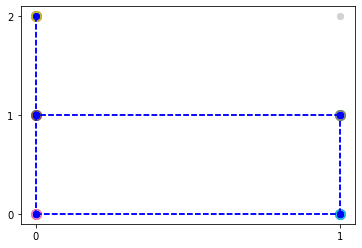

In [9]:
# Crete the map

Euler_map_1 = Euler_Map(vertices_list = [], edges_list = [])

# Vertice points

Euler_map_1.add_vertex(0,0)
Euler_map_1.add_vertex(1,0)
Euler_map_1.add_vertex(1,1)
Euler_map_1.add_vertex(0,1)
Euler_map_1.add_vertex(0,2)

# Edge connections

Euler_map_1.add_edge([0,0],[1,0])
Euler_map_1.add_edge([1,0],[1,1])
Euler_map_1.add_edge([1,1],[0,1])
Euler_map_1.add_edge([0,1],[0,0])
Euler_map_1.add_edge([0,2],[0,1])

# A list of vertex and edges is returned when the print call is done on the class;
print(Euler_map_1)
# Describe shows the numebr of connections of each point and the plot (based on the method call count_number_of_edges)
print("The description of the map is:")
Euler_map_1.describe_map()
print("If you only whant to show the map use the method show")
Euler_map_1.show()
print("To see if the map is has a Eulerian path, cycle or not use the method Eulerian")
Euler_map_1.Eulerian()


The map has a Euler cycle. All vertices have an even number of edges.


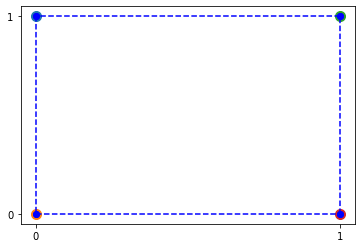

In [10]:
# You can remove a vertex using the method
Euler_map_1.remove_vertex(0,2)
# Again we can see if the map has Eulerian path, cycle or not
Euler_map_1.Eulerian()

# The map updates when we remove any element
Euler_map_1.show() 

The map has a Euler path.


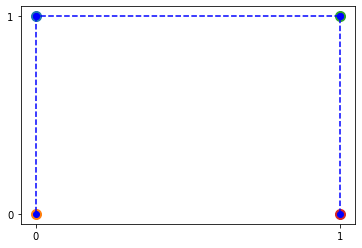

In [11]:
# You can also remove a edge from the map using the method
Euler_map_1.remove_edge([0,0],[1,0])
# Again we can see if the map has Eulerian path, cycle or not
Euler_map_1.Eulerian()

# The map updates when we remove any element
Euler_map_1.show() 

No Euler path or cycle is possible.


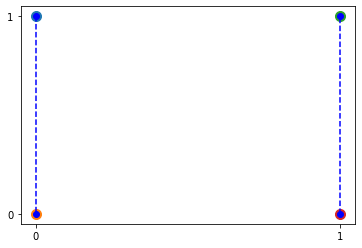

In [13]:
# Removing another edge
Euler_map_1.remove_edge([1,1],[0,1])
# Now the map do not have an Euler path or cycle
Euler_map_1.Eulerian()
Euler_map_1.show() 